<a href="https://colab.research.google.com/github/JuliaLorenzetti/data-science/blob/main/CodingTask1_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science Fundamentals for DCBP, S. Haug, University of Bern 

# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

1. Write a method (function) which removes the header information in the 
datafile and saves that information into a separate textfile. [0.5 points] 
2. Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
3. Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
4.Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
5.Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]


### Task 1

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Data Science/CCD-absorbance.txt'

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv(path, delimiter='\t', header=13) # the \t means tab. The data table starts at line 13
df.to_csv('stripped_data.csv') # save df to a new file

In [ ]:
#df.iloc[0,1780:1950]

### Task 2.1

We simplify the task a little bit and just assumes 7 wavelengths per nm. The number actually vary a bit, from 6-8 or so.

In [ ]:
#df.iloc[0,50:80]

In [8]:
%%timeit r=1 
def dfReduce(dfR,n):
  for i in range(0,df.shape[0]):
    s   = 2
    t   = 2
    for j in range(s,df.shape[-1],n):
      if (s+n)>df.shape[-1]: n=df.shape[-1]-s
      sum = 0.0
      for k in range(s,s+n):
        sum+= dfR.iloc[i,k]
      dfR.iloc[i,t]=sum/n
      #print(t,dfR.iloc[i,s])
      s +=n
      t +=1
  return dfR.iloc[:,0:t]
i=7
for fname in ['dfR1.csv']:  # ,'dfR2.csv','dfR3.csv','dfR4.csv']:
  dfR = df.copy()
  dfR = dfReduce(dfR,i)
  i += 7  # About 7 wavelengths per nm
  dfR.to_csv(fname)

KeyboardInterrupt: ignored

###Task 2.2

In [7]:
%%timeit -r 1
def dfRed(fname,n):
  new_df = df.copy()
  new_df = new_df.iloc[:,2:-1] # means: all rows, columns from 2 to the last one
  new_df = new_df.groupby([[i//n for i in range(0,new_df.shape[-1])]], axis = 1).mean() # groups together columns with the same name to average them
  new_df.insert(0,'time', (df.iloc[:,1]-df.iloc[0,1])/1000) # time in seconds, reactions starts at 0 seconds
  new_df.to_csv(fname)
  return new_df
for i in range(1,2): dfr = dfRed('dfR'+str(i)+'.csv',i*7)  # 7 columns correspond to ca. 1 nm
dfr.head()

1 loop, best of 1: 314 ms per loop


### Task 3

0

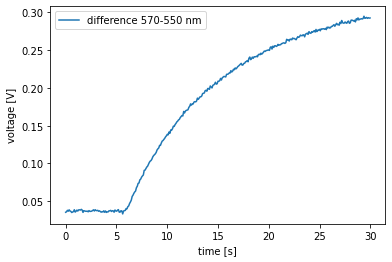

In [15]:
import matplotlib.pyplot as plt
def plotWaveLengthDiff(a,b):
  x = (df.iloc[:,1]-df.iloc[0,1])/1000 
  y = -(df.iloc[:,b]-df.iloc[:,a])
  plt.plot(x,y, label='difference 570-550 nm')
  plt.xlabel('time [s]')
  plt.ylabel('voltage [V]')
  plt.legend()
  return 0
# I give column numbers instead of wavelengths, i.e. instead of column names which corresponds to 570 and 550 nm
plotWaveLengthDiff(1778,1935)

### Task 4

In [21]:
b = 300
a = 250
for i in [1,7,14,21,28]:
  df1 = dfRed('dfR1.csv',i)
  x = df1.iloc[:,1]
  y = -(df1.iloc[:,300]-df1.iloc[:,250])
plt.plot(x,y,c='r',label='redline')
plt.xlabel('time [s]')
plt.ylabel('voltage [V]')
plt.title('difference betwwen wavelength columns '+str(b)+' and '+str(a))
plt.legend()
plt.savefig('myplot1.png')

IndexError: ignored

In [ ]:
%ls -l

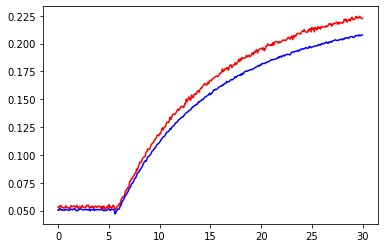

In [22]:
b = 1950
a = 1750
for i in [1,7]: #,14,21,28]: # higher column grouping gives funny plots, so only for two first
  b=int(b/i)
  a=int(a/i)
  df1 = dfRed('dfR1.csv',i)
  x = df1.iloc[:,0]
  y = -(df1.iloc[:,b]-df1.iloc[:,a])
  if i == 1:
    col='r'
  elif i == 7:
    col='b'
  plt.plot(x,y,c=col,label=str(i))

There is a difference between the not compressed and the compressed data. Does it have to do with the not exact wavelength transformation when compressing or is it a real difference. We would have to investigate further. 